### Data Description

The red-wine-quality dataset is a dataset of red and white wine , it contains 11 features that are used to test the quality of wine 
in the range  of 0 to 1 where 1 stands for high quality of wine and 0 stands for low quality of wine. so we have to build the model to
test the quality of wine

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('winequality-red.csv')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.shape

(1599, 12)

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


There is difference between 75percentile and max it means Outliers are present

and there is remarkable difference between mean and std means skewness is also present in dataset

In [11]:
# cehcking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

there are no null values present in the dataset

In [12]:
#checking correlation
dfcor=df.corr()

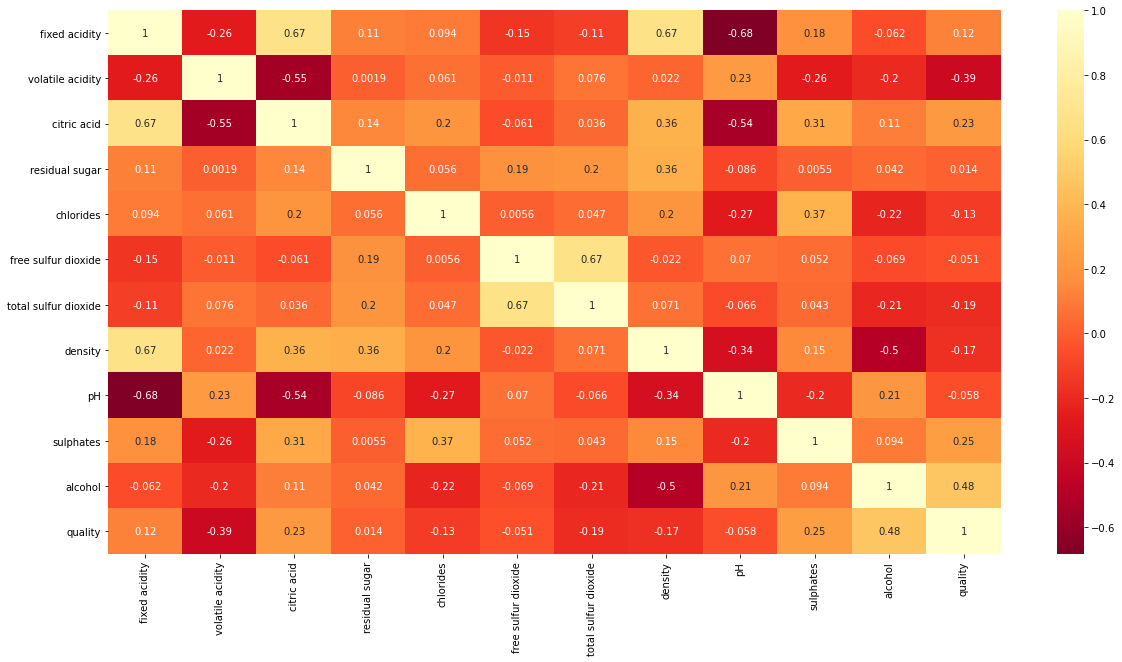

In [13]:
#visualizing  the correlation
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

quality is positively correlated with alcohol then sulphates then citric acid 

and negatively correated with  volatile acidity then  total sulphur dioxide and then density

In [14]:
# checking outliers
from scipy.stats import zscore
z=np.abs(zscore(df))

In [15]:
thresholds=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

fixed acidity              AxesSubplot(0.125,0.125;0.0545775x0.755)
volatile acidity        AxesSubplot(0.190493,0.125;0.0545775x0.755)
citric acid             AxesSubplot(0.255986,0.125;0.0545775x0.755)
residual sugar          AxesSubplot(0.321479,0.125;0.0545775x0.755)
chlorides               AxesSubplot(0.386972,0.125;0.0545775x0.755)
free sulfur dioxide     AxesSubplot(0.452465,0.125;0.0545775x0.755)
total sulfur dioxide    AxesSubplot(0.517958,0.125;0.0545775x0.755)
density                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
pH                      AxesSubplot(0.648944,0.125;0.0545775x0.755)
sulphates               AxesSubplot(0.714437,0.125;0.0545775x0.755)
alcohol                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
quality                 AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

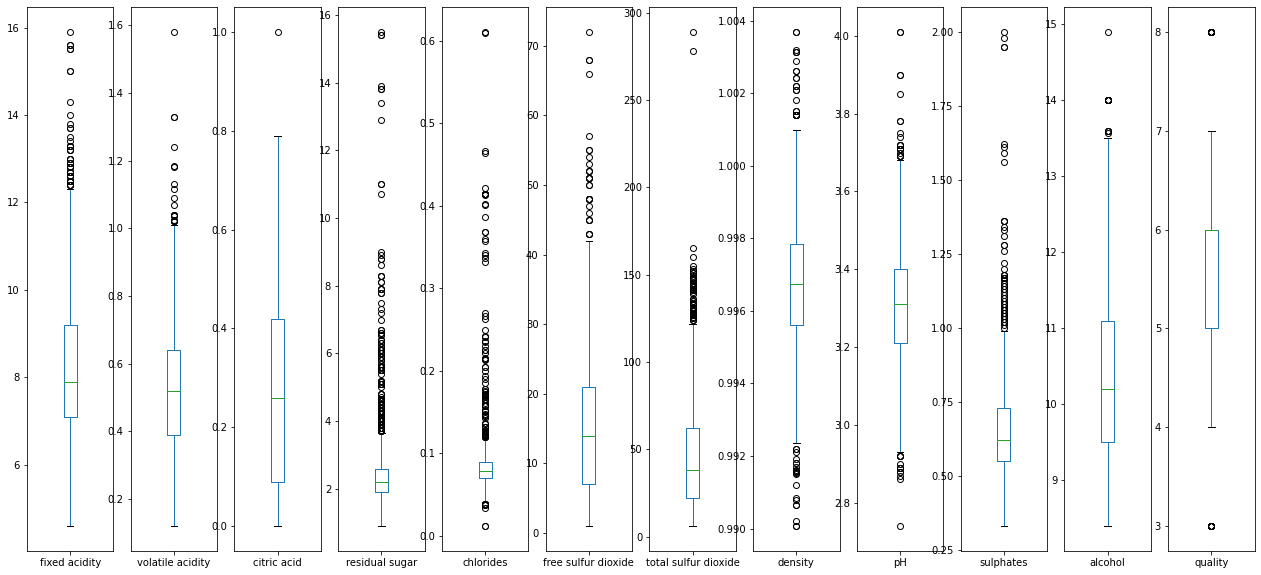

In [16]:
# plot outliers
df.plot(kind='box',figsize=(22,10),legend=False,subplots=True)

In [17]:
#removing outliers

df_new=df[(z<3).all(axis=1)]

In [18]:
df_new.shape

(1451, 12)

In [19]:
df.shape

(1599, 12)

148 rows are deleted as outliers

In [20]:
148/1599*100

9.255784865540964

9.2 percent data is deleted as outliers

###  checking skewness

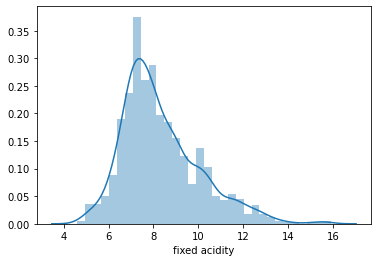

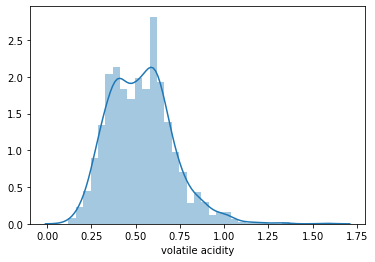

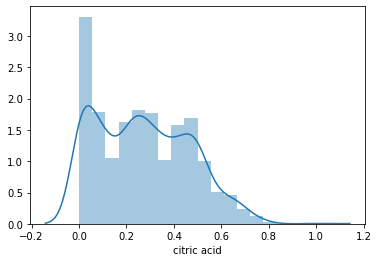

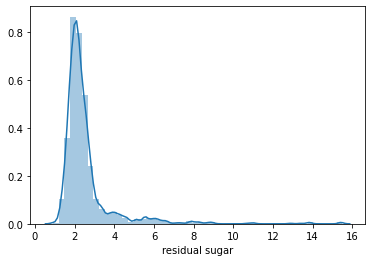

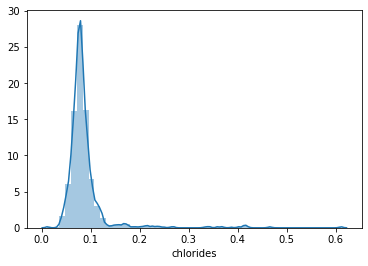

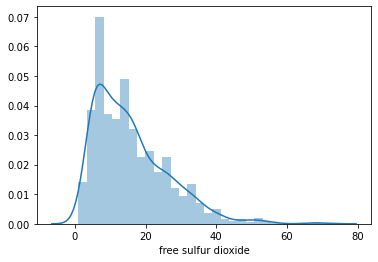

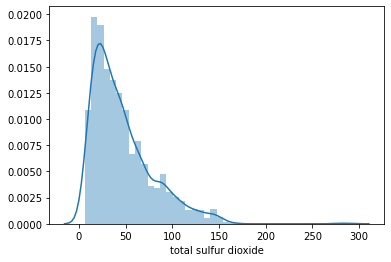

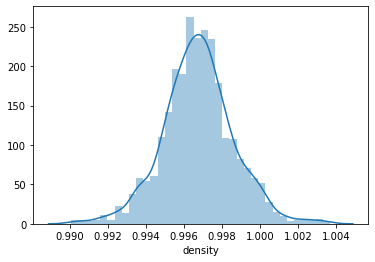

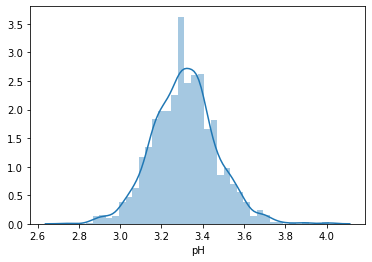

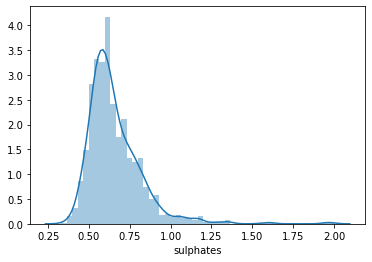

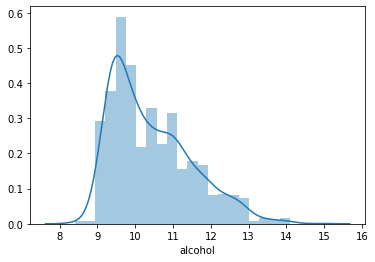

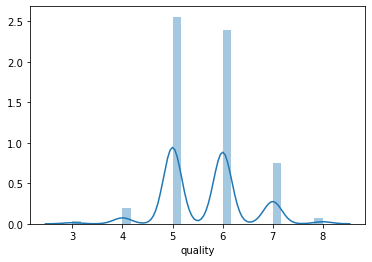

In [21]:
# Checking skewness
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
    

free sulphur dioxie, total sulphur dioxide ,sulpates, alcohol are rightly skewed

In [22]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

but as per the skew score only chlorides have high skewness

In [23]:
from scipy.stats import boxcox
df['chlorides']=boxcox(df['chlorides'],0)

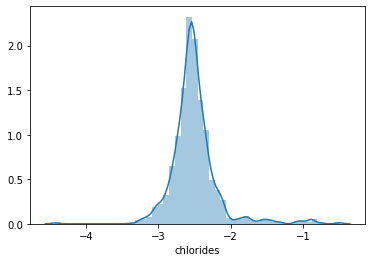

In [24]:
sns.distplot(df['chlorides'])

from rightly skewed it has turned in bell shape 

In [25]:
# separating independent and dependent variables
x=df.iloc[:,:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,-2.322788,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,-2.385967,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,-2.590267,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,-2.407946,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,-2.780621,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,-2.577022,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,-2.590267,32.0,44.0,0.99547,3.57,0.71,10.2


In [26]:
# as the independent variables are not on the same scale so applying standard scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x.shape

(1599, 11)

In [27]:
y=df.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

###  Finding best Random State

In [28]:
maxaccuracy=0
maxrandomstate=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    accuracy=accuracy_score(y_test,predlg)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        maxrandomstate= i
print("max accuracy is ",maxaccuracy,"at  the random_state is ",maxrandomstate )


max accuracy is  0.6676136363636364 at  the random_state is  519


In [29]:
maxaccuracy=0
maxrandomstate=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    accuracy=accuracy_score(y_test,preddtc)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        maxrandomstate= i
print("max accuracy is ",maxaccuracy,"at  the random_state is ",maxrandomstate )


max accuracy is  0.6931818181818182 at  the random_state is  365


the best Random state is 227

###  checking for the best model

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=227)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.65625
[[  0   0   2   2   0   0]
 [  0   5   4   7   0   0]
 [  0   3 104  25   3   0]
 [  0   1  33  94  12   1]
 [  0   1   4  15  26   1]
 [  0   0   0   4   3   2]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.31      0.38        16
           5       0.71      0.77      0.74       135
           6       0.64      0.67      0.65       141
           7       0.59      0.55      0.57        47
           8       0.50      0.22      0.31         9

    accuracy                           0.66       352
   macro avg       0.49      0.42      0.44       352
weighted avg       0.64      0.66      0.65       352



In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=227)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.6818181818181818
[[  0   0   4   0   0   0]
 [  0   0  12   4   0   0]
 [  0   0 117  18   0   0]
 [  0   0  29 104   8   0]
 [  0   0   3  25  19   0]
 [  0   0   0   7   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.71      0.87      0.78       135
           6       0.66      0.74      0.70       141
           7       0.66      0.40      0.50        47
           8       0.00      0.00      0.00         9

    accuracy                           0.68       352
   macro avg       0.34      0.33      0.33       352
weighted avg       0.62      0.68      0.64       352



In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=227)
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6107954545454546
[[  0   0   4   0   0   0]
 [  0   0  13   3   0   0]
 [  0   0 109  26   0   0]
 [  0   0  42  93   6   0]
 [  0   0   7  27  13   0]
 [  0   0   0   5   4   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.62      0.81      0.70       135
           6       0.60      0.66      0.63       141
           7       0.57      0.28      0.37        47
           8       0.00      0.00      0.00         9

    accuracy                           0.61       352
   macro avg       0.30      0.29      0.28       352
weighted avg       0.56      0.61      0.57       352



In [33]:
cvs=cross_val_score(dtc,x,y,cv=5)
print("Cross Validation Score for Decision Tree Classifier is ",cvs.mean())
print("\n\n")
cvs=cross_val_score(rfc,x,y,cv=5)
print("Cross Validation Score for Random Forest Classifier is ",cvs.mean())
print("\n\n")
cvs=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score for Support Vector Class is ",cvs.mean())
print("\n\n")


Cross Validation Score for Decision Tree Classifier is  0.47717476489028215



Cross Validation Score for Random Forest Classifier is  0.5609796238244513



Cross Validation Score for Support Vector Class is  0.5822413793103449





'''

MODEL                  ACCURACY                  CROSS-VAL-SCORE                 DIFFERENCE

DTC                     64                              47                         17
RF                      67                              57                         10                             
SVC                     61                             58                           3



'''

as there is less difference in accuracy and cross-val-score in SVC model so svc is considered to be the best model

## Hyperparameter Tuning

In [34]:
# creating parameter list to pass in GridSearchCV


from sklearn.model_selection import GridSearchCV
 
parameters ={'kernel':['rbf','linear','poly'],'C':[2,10]}

clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [2, 10], 'kernel': ['rbf', 'linear', 'poly']})

In [35]:
print(clf.best_params_)

{'C': 2, 'kernel': 'rbf'}


In [36]:
clf_pred=clf.best_estimator_.predict(x_test)

In [37]:
accuracy_score(y_test,clf_pred)

0.5994318181818182

In [38]:
import joblib
joblib.dump(clf.best_estimator_,'wine_dataset_svc.obj')

['wine_dataset_svc.obj']